<a href="https://colab.research.google.com/github/PraveenLiyanage/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Data Visualisation Datasets/data.csv.xls")

In [ ]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
df.info

<bound method DataFrame.info of                      date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0         7912     1.5           0     0          3        1340   
1         9050     2.0           0     4          5        3370   
2        11947     1.0           0     0          4        1930   
3         8030     1.0           0     0          4        1000   
4        10500     1.0           0     0          4        1140   
...        ...     ...         ...   ...        ...         ...   
4595      6360     1.0           0     0          4        1510   
4596      7573     2.0           0     0          3        1460   
4597      7014     2.0           0     0          3        3010   
4598      6630     1.0           0     0          3        1070   
4599      8102     2.0           0     0          4        1490   

      sqft_basement  yr_built  yr_renovated                    street  \
0                 0      1955          2005      18810 Densmore Ave N   
1               280      1921             0           709 W Blaine St   
2                 0      1966             0  26206-26214 143rd Ave SE   
3              1000      1963             0           857 170th Pl NE   
4               800      1976          1992         9105 170th Ave NE   
...             ...       ...           ...                       ...   
4595              0      1954          1979            501 N 143rd St   
4596              0      1983          2009          14855 SE 10th Pl   
4597              0      2009             0          759 Ilwaco Pl NE   
4598           1020      1974             0         5148 S Creston St   
4599              0      1990             0         18717 SE 258th St   

           city  statezip country  
0     Shoreline  WA 98133     USA  
1       Seattle  WA 98119     USA  
2          Kent  WA 98042     USA  
3      Bellevue  WA 98008     USA  
4       Redmond  WA 98052     USA  
...         ...       ...     ...  
4595    Seattle  WA 98133     USA  
4596   Bellevue  WA 98007     USA  
4597     Renton  WA 98059     USA  
4598    Seattle  WA 98178     USA  
4599  Covington  WA 98042     USA  

[4600 rows x 18 columns]>

In [ ]:
df.shape

(4600, 18)

In [ ]:
df.sample(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4027,2014-07-07 00:00:00,170500.0,2.0,1.00,1060,7700,1.0,0,0,3,820,240,1981,2013,1019 S 22nd Ct,Renton,WA 98055,USA
3221,2014-06-24 00:00:00,875000.0,4.0,2.50,3220,22588,2.0,0,0,3,3220,0,1996,0,14305 214th Way NE,Woodinville,WA 98077,USA
3652,2014-06-30 00:00:00,345000.0,2.0,1.00,970,5750,1.0,0,0,4,970,0,1932,1958,5601 29th Ave SW,Seattle,WA 98126,USA
462,2014-05-09 00:00:00,2238888.0,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0,7070 270th Pl SE,Issaquah,WA 98029,USA
3326,2014-06-25 00:00:00,190000.0,1.0,0.75,930,29258,1.0,0,0,3,930,0,1941,1994,7650 S 134th St,Seattle,WA 98178,USA


In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [ ]:
df.groupby("city")[["price"]].sum()

,price
city,
Algona,1.036440e+06
Auburn,5.268392e+07
Beaux Arts Village,7.450000e+05
Bellevue,2.422937e+08
Black Diamond,3.056450e+06
Bothell,1.588758e+07
Burien,2.582210e+07
Carnation,1.119254e+07
Clyde Hill,1.454140e+07


In [ ]:
average_price = df['price'].mean()
f"The average price is: {average_price:.2f}"

'The average price is: 551962.99'

In [ ]:
max_sale_percentage = df['price'].max()
print(f"The maximum sales percentage is: {max_sale_percentage:.2f}%")

The maximum sales percentage is: 26590000.00%


In [ ]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
floor_per_yr_built = df['yr_built'].value_counts()

<Axes: xlabel='city'>

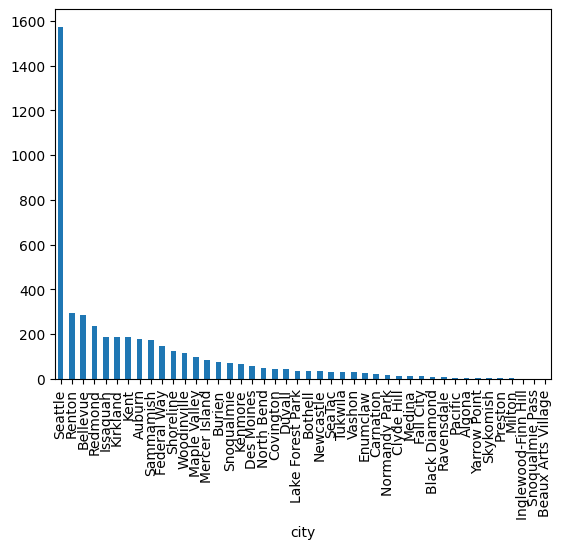

In [ ]:
df.city.value_counts().plot(kind="bar")

<Axes: ylabel='count'>

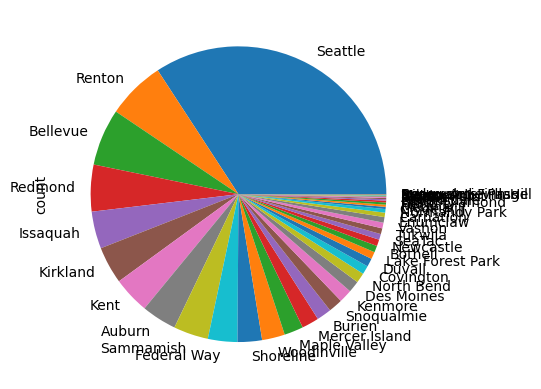

In [ ]:
df.city.value_counts().plot(kind="pie")

In [ ]:
top_5_prices = df['price'].head(5)
fig = px.pie(values=top_5_prices, names=top_5_prices.index, title="Top 5 Prices")
fig.show()

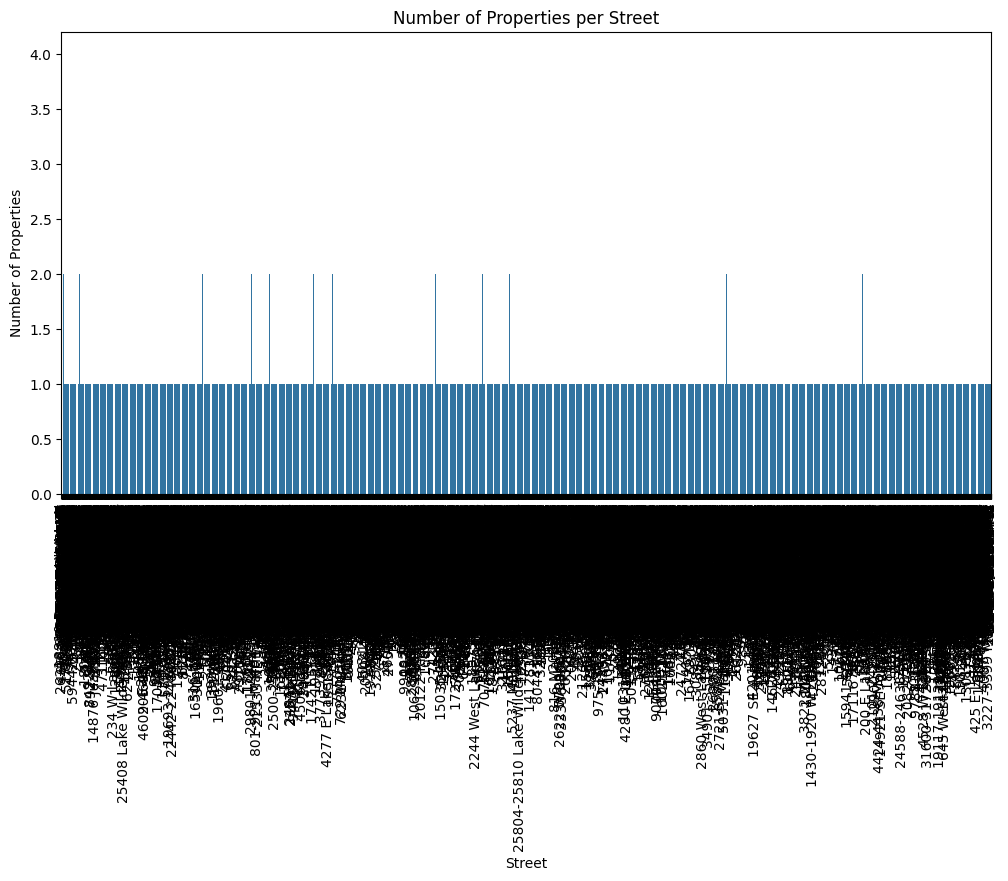

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='street', data=df)

plt.xlabel('Street')
plt.ylabel('Number of Properties')
plt.title('Number of Properties per Street')

plt.xticks(rotation=90)

plt.show()

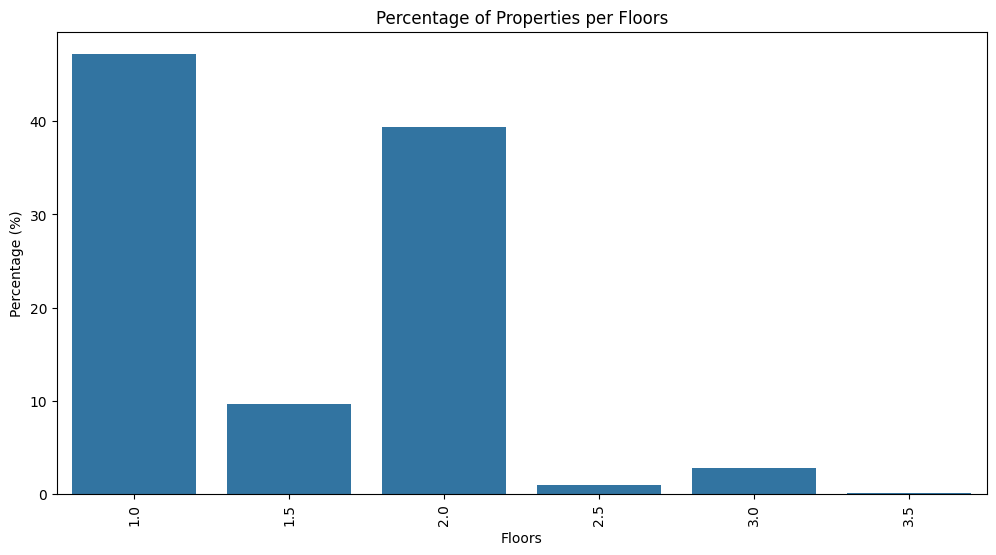

In [ ]:
floor_counts = df['floors'].value_counts()

floor_percentage = (floor_counts / len(df)) * 100

floor_percentage_df = floor_percentage.reset_index()
floor_percentage_df.columns = ['Floors', 'Percentage']


plt.figure(figsize=(12, 6))
sns.barplot(x='Floors', y='Percentage', data=floor_percentage_df)

plt.xlabel('Floors')
plt.ylabel('Percentage (%)')
plt.title('Percentage of Properties per Floors')

plt.xticks(rotation=90)

plt.show()

<Axes: xlabel='condition'>

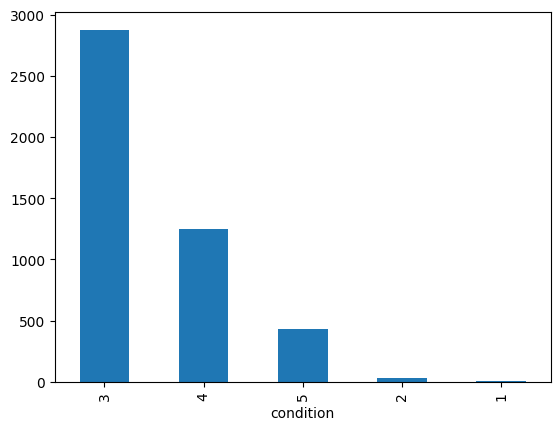

In [ ]:
df.condition.value_counts().plot(kind="bar")

In [ ]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


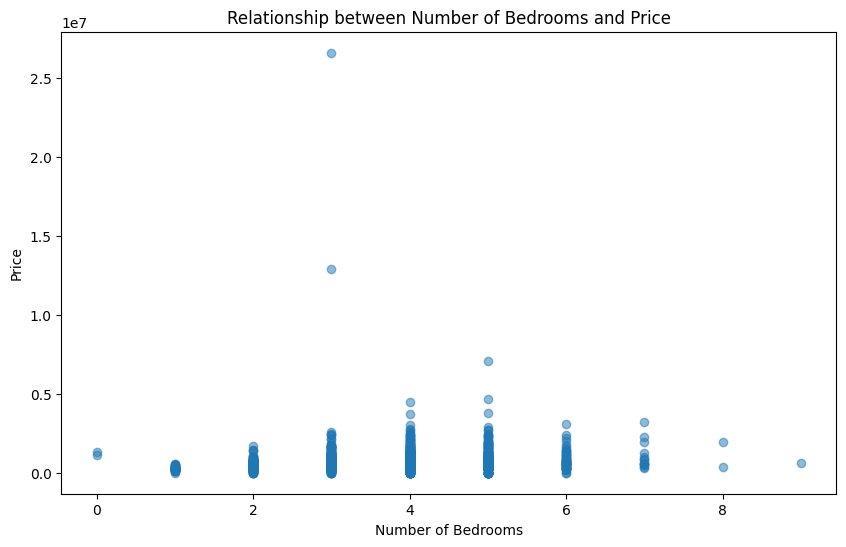

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['bedrooms'], df['price'], alpha=0.5)


plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Relationship between Number of Bedrooms and Price')

plt.show()

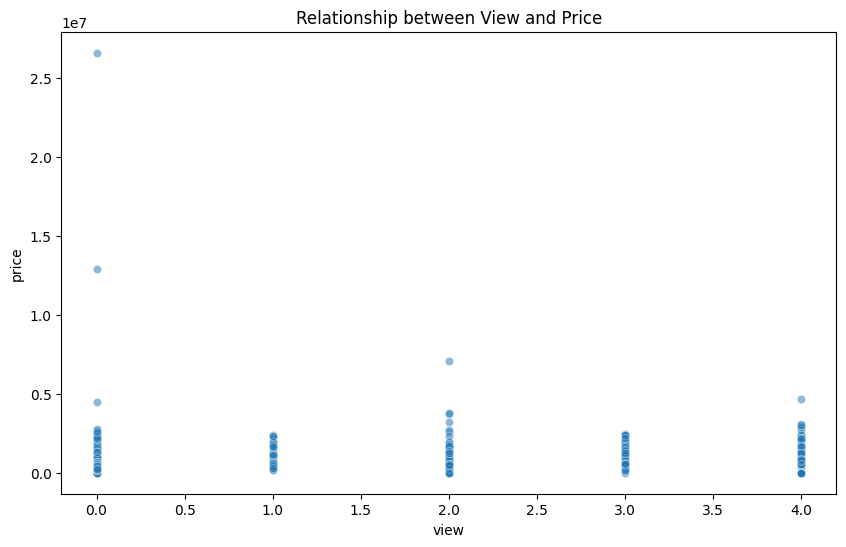

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='view', y='price', data=df, alpha=0.5)

plt.title('Relationship between View and Price')

plt.show()